In [74]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

import warnings

Датасет: CPU and GPU Performance (https://www.kaggle.com/datasets/michaelbryantds/cpu-and-gpu-product-data)

In [39]:
chips = pd.read_csv('./datasets/chip_dataset.csv').iloc[:, 1:]
chips['Release Date'] = chips['Release Date'].apply(lambda x: x.split('-')[0])
chips

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,Intel GMA 950,GPU,2005,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,2010,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,NVIDIA GeForce FX 5200,GPU,2003,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


Зависимость размера подложки от года выпуска процессора

C:\Users\klionkinvs\Anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 715 rows containing missing values.


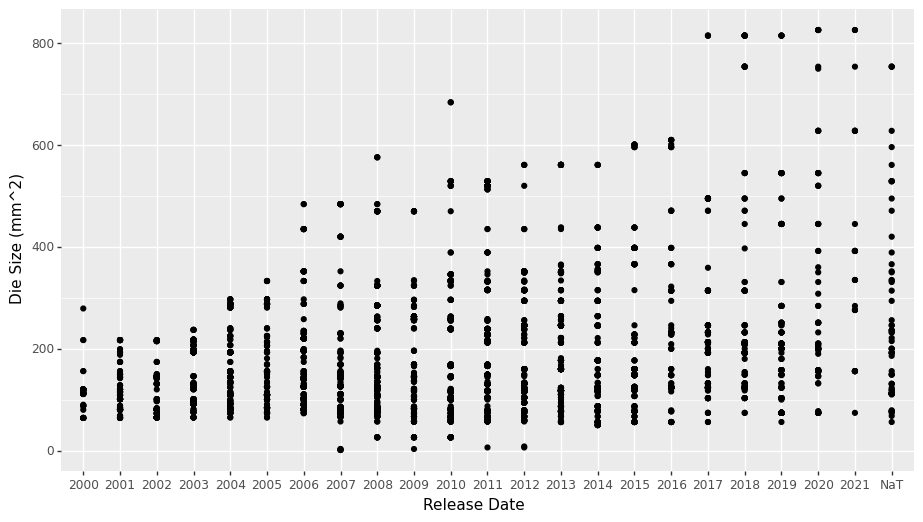

<ggplot: (105561960418)>

In [35]:
ggplot(data=chips) +\
geom_point(mapping=aes(x="Release Date", y="Die Size (mm^2)")) +\
theme(figure_size=(11, 6))

Недобросовестная визуализация: зависимость частоты устройств от производителя

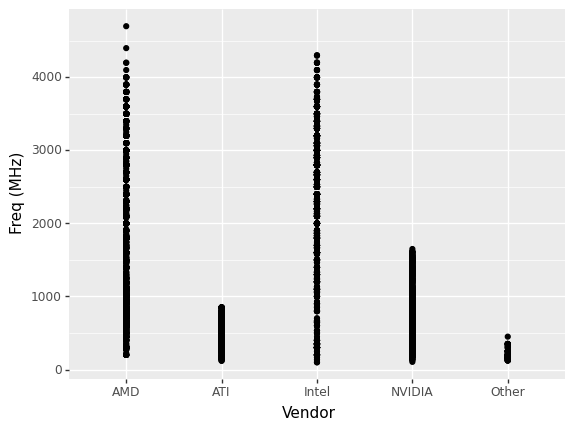

<ggplot: (105562112597)>

In [32]:
ggplot(data=chips) +\
geom_point(mapping=aes(x="Vendor", y="Freq (MHz)"))

Закон Мура

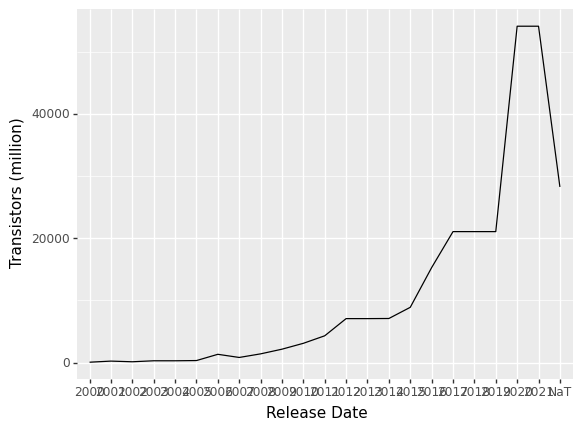

<ggplot: (105562858999)>

In [67]:
moore_df = chips[['Release Date', 'Transistors (million)']].groupby('Release Date').max()
moore_df = moore_df.reset_index()

ggplot(moore_df, aes(x='Release Date', y='Transistors (million)', group = 1)) +\
geom_line()

Размер техпроцесса в зависимости от фабрики

C:\Users\klionkinvs\Anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 9 rows containing non-finite values.


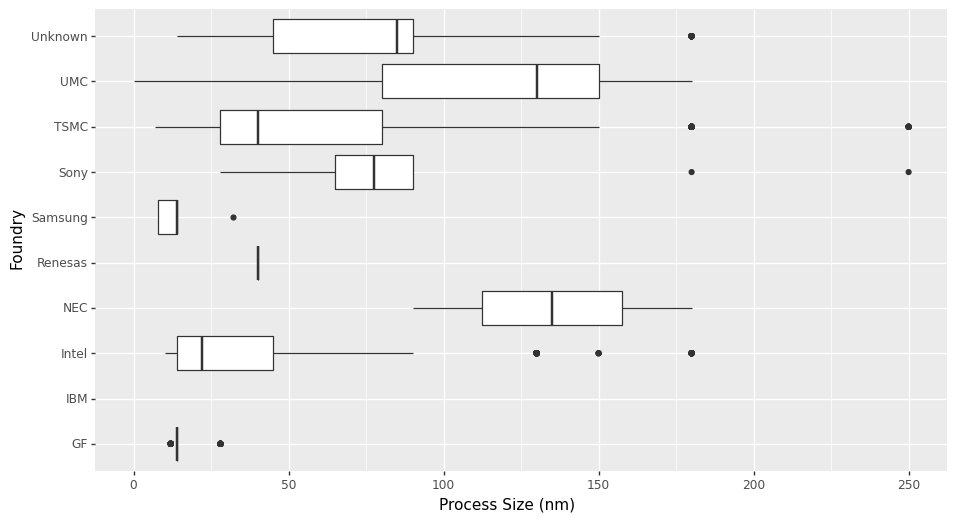

<ggplot: (105565301764)>

In [69]:
ggplot(chips) +\
geom_boxplot(aes(x='Foundry', y='Process Size (nm)')) +\
coord_flip() +\
theme(figure_size=(11, 6))